# Shape and Region Analysis Using OpenCV
## 🎯 Objective
To demonstrate and analyze geometric and region-based shape processing techniques—covering binary analysis, labeling, skeletonization, deformable models, boundary descriptors, and region descriptors—using Python and OpenCV.

## 🧩 Topics Covered
| No. | Concept                                     | Technique / Function                       |
| :-- | :------------------------------------------ | :----------------------------------------- |
| 1   | Binary Shape Analysis & Connectedness       | Thresholding + `cv2.connectedComponents()` |
| 2   | Object Labeling & Counting                  | Connected component labeling               |
| 3   | Size Filtering                              | Area-based mask filtering                  |
| 4   | Distance Functions                          | `cv2.distanceTransform()`                  |
| 5   | Skeletons & Thinning                        | `skimage.morphology.skeletonize()`         |
| 6   | Deformable Shape Analysis / Active Contours | `skimage.segmentation.active_contour()`    |
| 7   | Boundary Tracking                           | `cv2.findContours()`                       |
| 8   | Shape Models / Recognition                  | Compare Hu Moments                         |
| 9   | Centroid & Profiles                         | Moments for centroid                       |
| 10  | Handling Occlusion                          | Detect overlapping regions                 |
| 11  | Boundary Length Measures                    | Perimeter of contour                       |
| 12  | Boundary Descriptors                        | Chain Code & Fourier Descriptors           |
| 13  | Region Descriptors                          | Area, Compactness                          |
| 14  | Moments                                     | `cv2.moments()`                            |


## 🔧 Requirements
``` bash
pip install opencv-python scikit-image numpy matplotlib
```

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage.segmentation import active_contour
from skimage.draw import circle_perimeter
from skimage import measure

(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

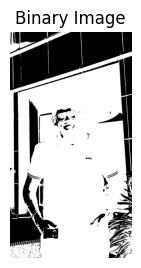

In [4]:

# Load and threshold image
img = cv2.imread('dataset/SatvikCasualPic.jpeg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Please place an image named 'shapes.png' in the same folder!")

_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(14, 10))
plt.subplot(3, 4, 1)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

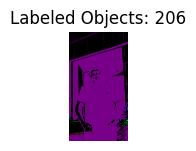

In [5]:
# 1️⃣ Connected Components & Labeling
num_labels, labels = cv2.connectedComponents(binary)
plt.subplot(3, 4, 2)
plt.imshow(labels, cmap='nipy_spectral')
plt.title(f'Labeled Objects: {num_labels-1}')
plt.axis('off')

(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

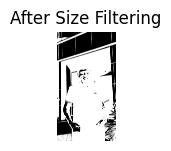

In [6]:
# 2️⃣ Size Filtering (remove small blobs)
areas = [np.sum(labels == i) for i in range(1, num_labels)]
mask = np.zeros_like(binary)
for i, area in enumerate(areas, 1):
    if area > 300:  # keep larger regions
        mask[labels == i] = 255
plt.subplot(3, 4, 3)
plt.imshow(mask, cmap='gray')
plt.title('After Size Filtering')
plt.axis('off')

(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

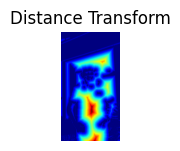

In [7]:
# 3️⃣ Distance Transform
dist = cv2.distanceTransform(mask, cv2.DIST_L2, 5)
plt.subplot(3, 4, 4)
plt.imshow(dist, cmap='jet')
plt.title('Distance Transform')
plt.axis('off')

(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

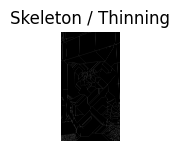

In [8]:

# 4️⃣ Skeletonization
skel = skeletonize(mask // 255)
plt.subplot(3, 4, 5)
plt.imshow(skel, cmap='gray')
plt.title('Skeleton / Thinning')
plt.axis('off')

(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

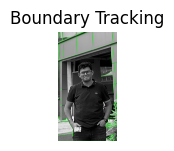

In [9]:
# 5️⃣ Boundary Extraction
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
boundary_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(boundary_img, contours, -1, (0, 255, 0), 2)
plt.subplot(3, 4, 6)
plt.imshow(boundary_img[..., ::-1])
plt.title('Boundary Tracking')
plt.axis('off')

In [10]:
# 6️⃣ Shape Recognition using Hu Moments
moments = [cv2.HuMoments(cv2.moments(c)).flatten() for c in contours]
print("Hu Moments for shapes:\n", np.array(moments))


Hu Moments for shapes:
 [[ 1.18673166e+00  1.26216922e+00  5.50646636e-01  3.68532776e-01
   1.65308412e-01  3.92105134e-01 -1.53144865e-02]
 [ 3.37101325e-01  4.89173582e-02  7.66768817e-03  8.11579664e-04
   2.00715703e-06  1.66689158e-04  2.64824163e-07]
 [ 2.02444930e+00  4.01501143e+00  6.35930786e-01  5.20625080e-01
   2.99422486e-01  9.86045293e-01  9.27236912e-03]
 [ 2.00662754e-01  4.47838770e-03  3.78075929e-03  7.40453817e-04
   1.17097451e-06  4.51569930e-05  4.04590534e-07]
 [ 2.42507646e-01  2.76580060e-02  3.92113340e-03  1.58239209e-03
   3.94138946e-06  2.62843518e-04  4.44451778e-08]
 [ 1.09771103e+00  1.10749943e+00  2.91312762e-02  1.03849414e-02
   1.60310502e-04  6.66130895e-03  8.32293891e-05]
 [ 5.89922741e-01  2.65238570e-01  1.22915648e-02  2.47932222e-03
  -5.23278997e-06 -6.30564155e-04  1.26470303e-05]
 [ 1.05629450e+01  1.11521252e+02  2.03997226e+01  2.04000546e+01
   4.16158841e+02  2.15430538e+02  2.68733629e-03]
 [ 1.97202575e-01  9.33026538e-03  1.731

Perimeter: 159.15, Centroid: (1086,1885)
Perimeter: 298.75, Centroid: (1148,1833)
Perimeter: 488.79, Centroid: (116,1810)
Perimeter: 161.68, Centroid: (1160,1785)
Perimeter: 95.74, Centroid: (1026,1773)
Perimeter: 147.92, Centroid: (17,1753)
Perimeter: 364.63, Centroid: (1165,1542)
Perimeter: 324.63, Centroid: (106,418)
Perimeter: 18509.17, Centroid: (602,1283)
Perimeter: 422.43, Centroid: (1088,93)
Perimeter: 685.40, Centroid: (690,161)
Perimeter: 2867.03, Centroid: (269,141)
Perimeter: 338.05, Centroid: (445,25)
Perimeter: 127.46, Centroid: (360,26)
Perimeter: 1495.27, Centroid: (67,116)


(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

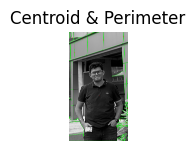

In [11]:
# 7️⃣ Boundary Length & Centroid
for c in contours:
    perimeter = cv2.arcLength(c, True)
    M = cv2.moments(c)
    if M["m00"] != 0:
        cx, cy = int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"])
        cv2.circle(boundary_img, (cx, cy), 5, (0, 0, 255), -1)
        print(f"Perimeter: {perimeter:.2f}, Centroid: ({cx},{cy})")

plt.subplot(3, 4, 7)
plt.imshow(boundary_img[..., ::-1])
plt.title('Centroid & Perimeter')
plt.axis('off')

(np.float64(-2.45),
 np.float64(51.45),
 np.float64(-15564.664688422172),
 np.float64(326872.57153496024))

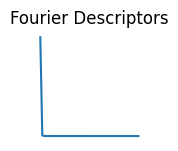

In [12]:
# 8️⃣ Fourier Descriptors (shape signature)
c = contours[0].squeeze()
complex_pts = c[:, 0] + 1j * c[:, 1]
fourier_desc = np.fft.fft(complex_pts)
plt.subplot(3, 4, 8)
plt.plot(np.abs(fourier_desc[:50]))
plt.title('Fourier Descriptors')
plt.axis('off')

In [13]:
# 9️⃣ Chain Code Representation
def chain_code(contour):
    code = []
    for i in range(len(contour) - 1):
        dx = contour[i+1][0][0] - contour[i][0][0]
        dy = contour[i+1][0][1] - contour[i][0][1]
        direction = (dx, dy)
        code.append(direction)
    return code[:20]  # first few
print("Sample Chain Code (dx, dy):", chain_code(contours[0]))


Sample Chain Code (dx, dy): [(np.int32(-1), np.int32(1)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(1)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0)), (np.int32(-1), np.int32(0))]


In [14]:
# 🔟 Region Descriptors (area, compactness)
for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    perim = cv2.arcLength(c, True)
    compactness = (4 * np.pi * area) / (perim ** 2)
    print(f"Shape {i+1}: Area={area:.1f}, Compactness={compactness:.3f}")

plt.tight_layout()
plt.show()

Shape 1: Area=288.5, Compactness=0.143
Shape 2: Area=1031.5, Compactness=0.145
Shape 3: Area=1159.0, Compactness=0.061
Shape 4: Area=968.0, Compactness=0.465
Shape 5: Area=342.0, Compactness=0.469
Shape 6: Area=271.5, Compactness=0.156
Shape 7: Area=1294.5, Compactness=0.122
Shape 8: Area=198.0, Compactness=0.024
Shape 9: Area=1841915.0, Compactness=0.068
Shape 10: Area=815.0, Compactness=0.057
Shape 11: Area=1090.0, Compactness=0.029
Shape 12: Area=22659.5, Compactness=0.035
Shape 13: Area=455.0, Compactness=0.050
Shape 14: Area=387.0, Compactness=0.299
Shape 15: Area=15818.0, Compactness=0.089


<Figure size 640x480 with 0 Axes>

## 🧾 Explanation of Results
| Concept                      | Description                                             | Output Interpretation                |
| :--------------------------- | :------------------------------------------------------ | :----------------------------------- |
| **Binary Analysis**          | Converts image into black & white for shape extraction. | Clear object silhouettes.            |
| **Connectedness & Labeling** | Identifies separate regions (connected pixels).         | Unique color per object.             |
| **Size Filtering**           | Removes small noise blobs.                              | Only larger shapes remain.           |
| **Distance Function**        | Distance of every pixel to nearest boundary.            | Warmer color = farther from edge.    |
| **Skeletonization**          | Reduces shape to single-pixel-wide skeleton.            | White skeleton lines.                |
| **Boundary Tracking**        | Extracts and outlines shape boundaries.                 | Green contours around shapes.        |
| **Hu Moments**               | Invariant shape descriptors for recognition.            | Similar shapes → similar Hu vectors. |
| **Centroid & Perimeter**     | Shape center & boundary length.                         | Red dot = centroid.                  |
| **Fourier Descriptors**      | Frequency domain signature of shape boundary.           | Graph curve distinguishes shapes.    |
| **Chain Code**               | Encodes contour direction sequence.                     | Array of direction pairs.            |
| **Region Descriptors**       | Quantify size and compactness.                          | Circle > Compactness ≈ 1.            |
| **Moments**                  | Statistical measures for shape properties.              | Used for centroid, orientation.      |
